# Exporatory Data Analysis of Pink Cab and Yellow Cab Company 

## Scope: 
Areas to investigate:

    1. Which company has maximum cab users at a particular time period?

    2. Does margin proportionally increase with increase in number of customers?

    3. What are the attributes of these customer segments?


## Testing Goals: 
List of Hypothesis:

    1. Customers who pay in cash spend less per trip on average compared to customers who pay with card

    2. Cities with higher populations have a higher user to population ratio 

    3. Yellow Cab has a higher avergage price charger than Pink Cab due to a high number of customers 

    4. Customers in a higher age group pay for more cabs on average. 

    5. Which city has a higher average cost of trip: Boston or Altanta
    

In [104]:
#Importing the needed packages 
import pandas as pd     
import matplotlib.pyplot as plt
import numpy as np 


In [105]:
#Putting the CSV's into Data Frames
cabs = pd.read_csv("Cab_Data.csv")
city = pd.read_csv("City.csv")
customer = pd.read_csv("Customer_ID.csv")
transact = pd.read_csv("Transaction_ID.csv")

In order to preform Exploratory Data Analysis, I will filter the dataframes in order to create qualitative statistics from said data. 

## Hypothesis 1 

### Method
I will first filter the Transaction ID data into a Cash only data frame and a Card only data frame. From there, i will create two new data frames from the Cab Data. One which has only transaction id's related to cash as a form a payment and the other which has transaction id's related to card as a payment method. I will finally compute the average to test out the hypothesis that cash payments have a lower cost on average than card payments on average. 

In [106]:
#Creating the cash as a payment mode and card as a payement mode dataframe from Transaction_ID.csv
query1 = "Card"
query2 = "Cash"
Card = transact.query("Payment_Mode in @query1")
Cash = transact.query("Payment_Mode in @query2")

#creating the a list of transactions by card and the list of transactions by cash
transactcard = Card["Transaction ID"].astype(str)
transactcash = Cash["Transaction ID"].astype(str)
transactcard = transactcard.values.tolist()
transactcash = transactcash.values.tolist()

#Filtering the Cab_Data.csv into a data frame of cash transaction and a data frame of card transaction
cabs.columns = ["Transaction_ID", "Date_of_Travel", "Company", "City", "KM_Travelled", "Price_Charged","Cost_of_Trip" ]
cabs["Transaction_ID"] = cabs["Transaction_ID"].astype(str)
Card = cabs.query("Transaction_ID in @transactcard")
Cash = cabs.query("Transaction_ID in @transactcash")

#Finding the average cost per cash ride
Cash_Cost_Average = Cash["Cost_of_Trip"].mean()
print(f"The average cost on a trip paid by cash is: {Cash_Cost_Average}.")

#Finding the average cost per card ride
Card_Cost_Average= Card["Cost_of_Trip"].mean()
print(f"The average cost on a trip paid by a card is: {Card_Cost_Average}.")

The average cost on a trip paid by cash is: 286.01643771266134.
The average cost on a trip paid by a card is: 286.30607245619234.


### Conclusion for Hypothesis 1 
The results of computing the averages on cash paid trips and card paid trips are: 

>    The average cost on a trip paid by cash is: 286.01643771266134. 

>    The average cost on a trip paid by a card is: 286.30607245619234.

This appears to be a negliable difference. Further modelling can explore the difference and its significance. 

## Hypothesis 2 

### Method
In order to test this hypothesis I will need the City.csv and the calculate the user to population ratio. Finally I will graph the results as scatter plot with a trend line in order to determine if a trend exists. 

In [107]:
#Turning columns into strings
city["Users"] = city["Users"].astype(str)
city["Population"] = city["Population"].astype(str)

#Removing spaces from column values
city["Users"] = city["Users"].str.replace(" ", "")
city["Population"] = city["Population"].str.replace( " ", "")

#Removing commas from column values
city["Users"] = city["Users"].str.replace(",", "")
city["Population"] = city["Population"].str.replace(",", "")

#Turning Users and Population Columns to numbers 
city["Users"] = city["Users"].apply(pd.to_numeric)
city["Population"] = city["Population"].apply(pd.to_numeric)

#Creating ratio column
city["Ratio"] = city["Users"] / city["Population"]

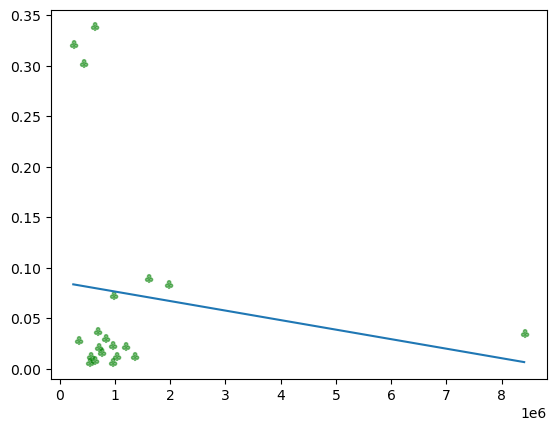

In [108]:
x = city["Population"]
y = city["Ratio"]
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y, c="g", alpha=0.5, marker=r'$\clubsuit$',
            label="Luck")
plt.xlabel = "Population"
plt.ylabel = "Ratio"
plt.plot(x, m*x + b)
plt.show()

### Conclusion to Hypothesis 2 

From the graph (which can be shown by running all scripts in this notebook), there is a negative trend between ratio and population. As the ratio between users and population decreases, does the poplulation.

## Hypothesis 3 

### Method

In order to determine which Cab Company, Pink or Yellow, has a higher average profit, I will create two new data frames. One will be for Pink Cab and one will be for Yellow Cab. I will calulcate the average Cost of trip and then I will compare the difference between the two companies. 

In [109]:
pink = "Pink Cab"
yellow = "Yellow Cab"

pinkcabs= cabs.query("Company in @pink")
yellowcabs = cabs.query("Company in @yellow")

Average_Cost_Pink = pinkcabs["Cost_of_Trip"].mean()
Average_Cost_Yellow = yellowcabs["Cost_of_Trip"].mean()

Number_of_Pink = pinkcabs.shape[0]
Number_of_Yellow = yellowcabs.shape[0]

print(Number_of_Pink)
print(Number_of_Yellow)
Differece_Pink_to_Yellow = Average_Cost_Pink - Average_Cost_Yellow



84711
274681


### Conclusion to Hypothesis 3

The average cost per trip of Pink Cab is 248.1486820955983 and the average cost per trip of Yellow Cab is 297.92200414007254. This result in a difference of -49.77332204447424 between Pink Cab and Yellow Cab. 

The number of customers for pink cab is 84711 and the number of yellow cab customers are 274681. 

Given these 2 results, hypothesis 3 appears to be true. 

## Hypothesis 4 

### Method 

I will set the age groups into two: 15 to 40, 41 to 100. Given these two groups I will create two data sets. I,  then, have to filter the Transaction ID's with the Customer ID's from the wo age groups. From there is will seperate the Cab Data into 2 new dataset based on the age group. I will then calculate the average cost of trip for the two age groups and compare. 

In [115]:
age1 = list(range(15,41))
age2 = list(range(41,101))

customer.columns =["Customer_Id", "Gender", "Age", "Income"]
young = customer.query("Age in @age1")
old = customer.query("Age in @age2")

age1 = young["Customer_Id"].to_list()
age2 = old["Customer_Id"].to_list()

transact.columns = ["Transaction_ID", "Customer_ID", "Payment_Mode"]
youngtrans = transact.query("Customer_ID in @age1")
oldtrans = transact.query("Customer_ID in @age2")

age1 = youngtrans["Transaction_ID"].to_list()
age2 = oldtrans["Transaction_ID"].to_list()

youngtrans = cabs.query("Transaction_ID in @age1")
oldtrans = cabs.query("Transaction_ID in @age2")

Average_young = cabs["Cost_of_Trip"].mean()
Average_old = cabs["Cost_of_Trip"].mean()


286.1901128244248


### Conclusion 

The average cost of trip for customers between the ages of 15 to 40 is the exact same as the average cost f trip for customers between the ages of 41 to 100. The average cost is 286.1901128244248. 

## Hypothesis 5 

### Method 
I will be testing to see the average cost of cabs in Atlanta versus the average cost of cabs in Boston. I will be filtering the Cab Data into two data sets one for Altanta and one for Boston. From there I will calculate the average. 


In [121]:
alt ="ATLANTA GA"
bos = "BOSTON MA"

cabsalt = cabs.query("City in @alt")
cabsbos = cabs.query("City in @bos")

Avg_alt = cabsalt["Cost_of_Trip"].mean()
Avg_bos = cabsbos["Cost_of_Trip"].mean()



282.89120529310577
289.3384127037589


### Conclusion
From the calculations the average cost per trip in atlanta is 283 whereas the average trip in boston is 289. This is a slight difference between the two cities.